<a href="https://colab.research.google.com/github/LuisAL79/Mincursos-e-Modulos/blob/main/Modulo_III_Math_Sympy_Vector_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SYMPY**: Python library for symbolic mathematics

----

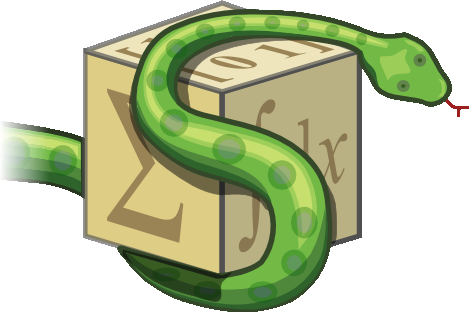

----

https://docs.sympy.org/latest/tutorials/intro-tutorial/features.html

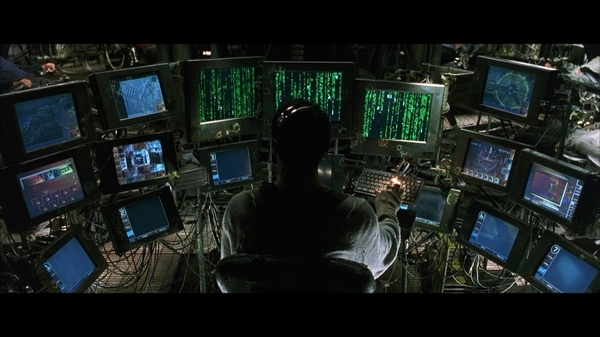

from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [ ]:
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)

# **Cálculo Vetorial**

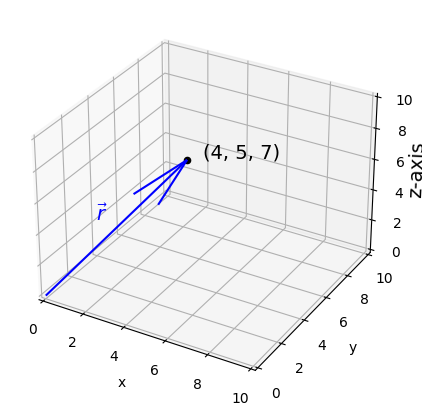

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create plot
fig = plt.figure(figsize=(8,5))

# Add subplot with 3D axes projection
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, 4, 5, 7,
          color="blue")

ax.scatter(4, 5, 7, c="black")

ax.text(4.5, 5.5, 7, "(4, 5, 7)", fontsize=14)
ax.text(2, 1, 5, r"$\vec{r}$", fontsize=14, color="blue")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z-axis",rotation=45,labelpad=-1.8,fontsize=14)
#ax.zaxis.labelpad=-1.7 # <- change the value here

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)

plt.show()

## **Vetores constantes**

In [ ]:
from sympy import *
from sympy.vector import *

R = CoordSys3D('')

Rv = 3*R.i+4*R.j-2*R.k

display(Rv)

(3) i_ + (4) j_ + (-2) k_

In [ ]:
Ru = 2*Rv + 5*R.i
Ru

(11) i_ + (8) j_ + (-4) k_

In [ ]:
Rs = Ru + Rv
Rs

(14) i_ + (12) j_ + (-6) k_

### **Cálculo do módulo**

In [ ]:
Rv.magnitude()

√29

### **Normalização**

In [ ]:
Rv.normalize()

⎛3⋅√29⎞      ⎛4⋅√29⎞      ⎛-2⋅√29 ⎞   
⎜─────⎟ i_ + ⎜─────⎟ j_ + ⎜───────⎟ k_
⎝  29 ⎠      ⎝  29 ⎠      ⎝   29  ⎠   

## **Produtos $\cdot$ e $\times$**

In [ ]:
Rd = Rv.dot(Ru)
Rd

73

In [ ]:
Rc = Rv.cross(Ru)
Rc

(-10) j_ + (-20) k_

## **Vetores variáveis**

In [ ]:
Rv = R.x**2*R.j+R.x*R.y*R.i+R.y**2*R.k
Rv

             ⎛  2⎞       ⎛  2⎞    
(x_⋅y_) i_ + ⎝x_ ⎠ j_  + ⎝y_ ⎠ k_ 

## **Campos**

## **Campo escalar**

```{index} Scalar and vector fields
```
**Scalar field** is a scalar quantity that varies with position and can be written as $\Omega(x,y,z)=\Omega(\mathbf{r})$. Scalar fields are for example temperature and density. 3D scalar fields can be represented as iso-surfaces in 3D or contour plots in 2D for specific $z$ value.

For example, let's plot a scalar field:

$$f(x,y,z)=ze^{-xy}$$

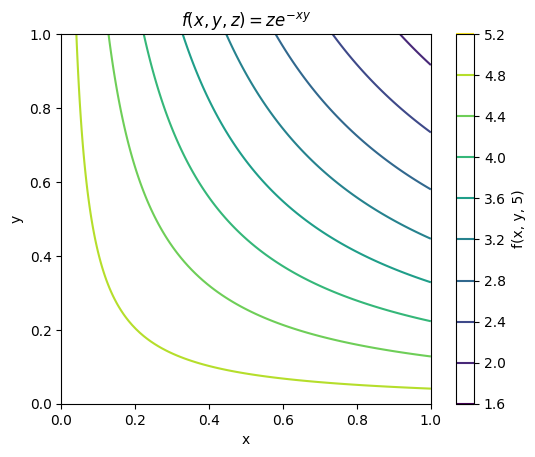

In [ ]:
# Create x and y values between 0 and 1
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

# Create 2D grid ourt of x and y
X, Y = np.meshgrid(x, y)
Z = 5

# Create a contour plot
plt.contour(X, Y, Z*np.exp(-X*Y))

plt.colorbar(label="f(x, y, %g)" % Z) #%g substuir o valor de Z

plt.title(r"$f(x, y, z) = ze^{-xy}$")
plt.xlabel("x")
plt.ylabel("y")

plt.gca().set_aspect("equal")

plt.show()

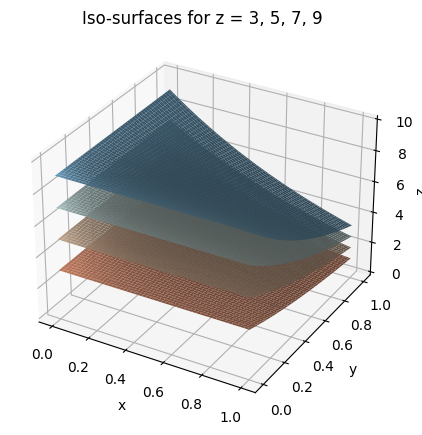

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create plot
fig = plt.figure(figsize=(8,5))

# Add subplot with 3D axes projection
ax = fig.add_subplot(111, projection='3d')

colours = ["lightsalmon", "peachpuff", "lightcyan", "lightskyblue"]

# Plot surface
for idx, z in enumerate(range(3,10,2)):
    ax.plot_surface(X, Y, z*np.exp(-X*Y), color=colours[idx])

# Add extras
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z",labelpad=0,rotation=90)

# Adjust axis limits
# Ajuste os valores limite conforme necessário para fornecer espaço suficiente para o rótulo
ax.set_zlim3d(0, 10)

ax.set_title("Iso-surfaces for z = 3, 5, 7, 9")

# Display
plt.show()

In [ ]:
omega = R.x**2+R.x*R.y+R.y**2

display(omega)

  2             2
x_  + x_⋅y_ + y_ 

## **Campo vetorial**

is a vector quantity that varies as a function of position and can be written as $\mathbf{F}(x,y,z)=\mathbf{F}(\mathbf{r})$. A vector field is for example ocean currents or wind field.

One way to visualise vector field is to use a _quiver plot_, where at each location we can draw an arrow with length and direction based on magnitude and direction of the field at that location. Quiver plots in Python can be plotted using 2D array of locations and x and y components of vector field at each location:

```{index} Quiver plot
```

⎛   2    ⎞       ⎛   2    ⎞    
⎝sin (x_)⎠ i_  + ⎝cos (y_)⎠ j_ 

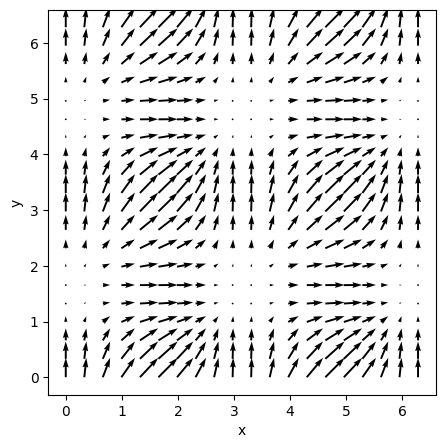

In [ ]:
R = CoordSys3D('')

u = sin(R.x)**2*R.i+cos(R.y)**2*R.j
display(u)

# Locations
x = np.linspace(0, 2*np.pi, 20)
y = np.linspace(0, 2*np.pi, 20)

X, Y = np.meshgrid(x,y)

# x and y components of the field
U = np.sin(X)**2
V = np.cos(Y)**2

plt.figure(figsize=(5,5))
plt.quiver(X, Y, U, V, scale=20,
          width=0.005)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

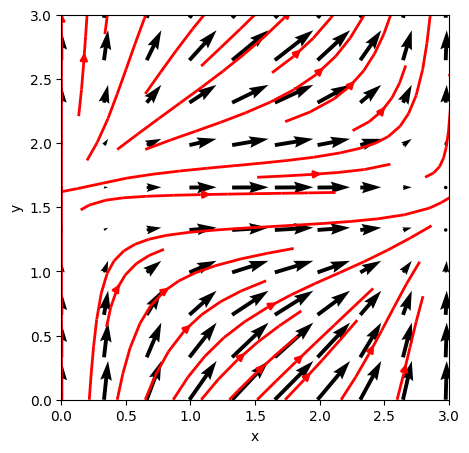

In [ ]:
plt.figure(figsize=(5,5))

plt.quiver(X, Y, U, V, scale=10, width=0.01)

plt.streamplot(X, Y, U, V, color="red", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(0,3)
plt.ylim(0,3)

plt.show()

## **Differentiation of vector field**
```{index} Vector differentiation
```
To differentiate vector functions, $\mathbf{F}=f_x\hat{i}+f_y\hat{j}+f_z\hat{k}$, we need to take derivatives of its components:

\begin{equation}
\frac{d\mathbf{F}}{dt}=\Big(\frac{df_x}{dt}, \frac{df_y}{dt}, \frac{df_z}{dt}\Big).
\end{equation}

**Example:**

Let's find the derivative of $\mathbf{F}(t)=[t+(t/10)\sin(t), t+(t/10)\cos(t)]$ with respect to $t$. We will differentiate each component to get:

\begin{equation}\frac{d\mathbf{F}}{dt}=\Big[\Big(1+\frac{1}{10}\sin(t)+\frac{t}{10}\cos(t)\Big), \Big(1+\frac{1}{10}\cos(t)-\frac{t}{10}\sin(t)\Big) \Big].
\end{equation}

We can also use [SymPy](https://www.sympy.org/en/index.html) package for Python that allows symbolic mathematics. With this package we can get analytical solutions to derivatives in this example. At first we can create separate derivatives:

```{index} SymPy: differentiation
```

In [ ]:
# Create a symbol t variable will go by
t = symbols("t")

Fx = t+(t/10)*sin(t)
display(Fx)
print()

Fy = t+(t/10)*cos(t)
display(Fy)

t⋅sin(t)    
──────── + t
   10       

t⋅cos(t)    
──────── + t
   10       

In [ ]:
r = CoordSys3D('')

F = Fx*r.i + Fy*r.j
F

⎛t⋅sin(t)    ⎞      ⎛t⋅cos(t)    ⎞   
⎜──────── + t⎟ i_ + ⎜──────── + t⎟ j_
⎝   10       ⎠      ⎝   10       ⎠   

In [ ]:
diff(F,t)

⎛t⋅cos(t)   sin(t)    ⎞      ⎛  t⋅sin(t)   cos(t)    ⎞   
⎜──────── + ────── + 1⎟ i_ + ⎜- ──────── + ────── + 1⎟ j_
⎝   10        10      ⎠      ⎝     10        10      ⎠   

## **Gradiente $\vec{\nabla}$**

![Gradient descent example](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0403c.jpg)


```{index} Gradient of a scalar field
```
We can take derivatives of a scalar field, $H$, in three directions $x$, $y$ and $z$. Three derivatives then create a vector field known as _gradient_:

$$\nabla H = \Big(\frac{\partial H}{\partial x}, \frac{\partial H}{\partial y}, \frac{\partial H}{\partial z}\Big).$$

The $\nabla$ symbol is known as "nabla" or "del" and it is defined as:

$$\nabla = \Big(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial }{\partial z}\Big).$$

The vector $\nabla H$ represents the rate of change of $H$ in space.

Let's use SymPy to find gradient of a scalar field

$$H=3x^2+2xy+y^2$$

In [ ]:
H = 3*r.x**2 + 2*r.y*r.x + r.y**2
display(H)
print()

graH = Gradient(H)
display(graH)
print()

graH = gradient(H)
graH

    2               2
3⋅x_  + 2⋅x_⋅y_ + y_ 

      2               2 
∇(3⋅x_  + 2⋅x_⋅y_ + y_ )

(6⋅x_ + 2⋅y_) i_ + (2⋅x_ + 2⋅y_) j_

The gradient becomes a vector in $\hat{\mathbf{i}}$ (x), $\hat{\mathbf{j}}$ (y) and $\hat{\mathbf{k}}$ (z) directions.

Let's create a contour plot of scalar field $H$ and quiver plot of $\nabla H$.

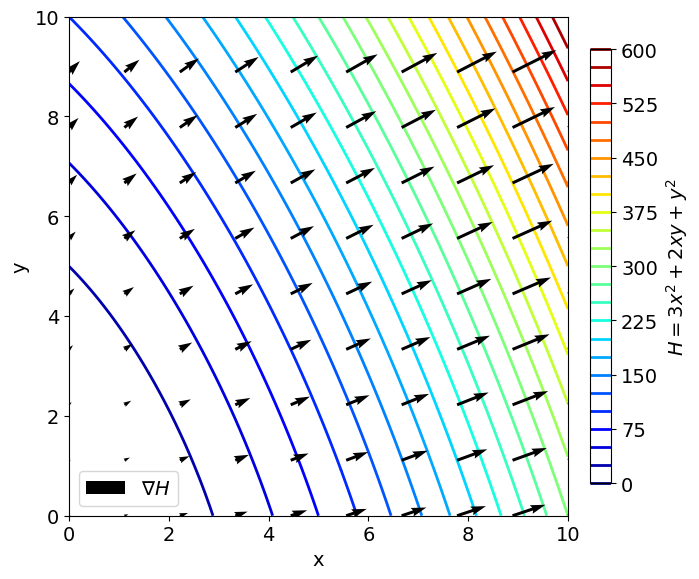

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(7,7))

x = np.linspace(0,10,100)
y = np.linspace(0,10,100)

X, Y = np.meshgrid(x, y)

t=0
H = 3*X**2+2*X*Y+Y**2

# Create contour plot of scalar field
plt.contour(X, Y, H, 25, cmap="jet",
           zorder=1, linewidths=2)

plt.colorbar(label=r"$H=3x^2+2xy+y^2$",
             fraction=0.04, pad=0.04)

x = np.linspace(0,10,10)
y = np.linspace(0,10,10)

X, Y = np.meshgrid(x, y)

# Create quiver plot of the gradient
plt.quiver(X, Y, 6*X+2*Y, 2*X+2*Y,
           label=r"$\nabla H$", zorder=2)

plt.legend(loc="lower left")

plt.xlabel("x")
plt.ylabel("y")

plt.gca().set_aspect("equal")

plt.show()

## **Divergência**


```{index} Divergence of a vector field
```
The _divergence_ of a vector field $\mathbf{F}=(f_x, f_y, fz)$ is:

$$\text{div}\mathbf{F}=\nabla\cdot\mathbf{F}=\frac{\partial f_x}{\partial x}+\frac{\partial f_y}{\partial y}+\frac{\partial z}{\partial z}.$$

For example, take divergence of a vector field $\mathbf{F}=(x^2,3y,x^3)$:

```{index} SymPy: divergence
```

In [ ]:
v1 = R.x**2*R.i+ 3*R.y*R.j+R.x**3*R.k
display(v1)
print()

divergence(v1)

⎛  2⎞                   ⎛  3⎞    
⎝x_ ⎠ i_  + (3⋅y_) j_ + ⎝x_ ⎠ k_ 

2⋅x_ + 3

If divergence is applied to the flow velocity of some fluid, the divergence represents the net amount of fluid entering or leaving a particular point. The divergence is zero for incompressible fluids. Positive divergence implies that density of the fluid decreases at that location, while negative divergence suggests it is increasing.

If we look at the field $\mathbf{F}(x,y)=(x,y)$, its divergence is:

In [ ]:
v1 = R.x*R.i+ R.y*R.j
display(v1)
divergence(v1)

(x_) i_ + (y_) j_

2

If that field indicated flow velocity, the positive divergence would mean flow increasing outward, which can indeed be seen in a quiver plot:

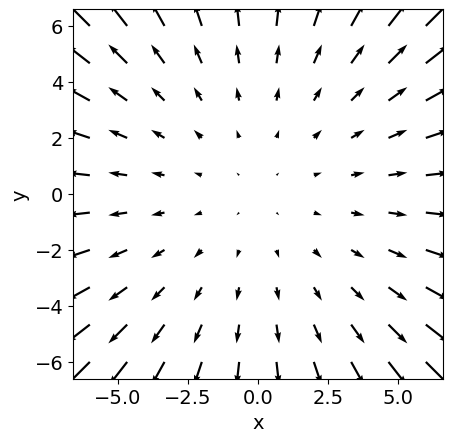

In [ ]:
x = np.linspace(-6, 6, 10)
y = np.linspace(-6, 6, 10)

X, Y = np.meshgrid(x, y)

plt.quiver(X, Y, X, Y)
plt.gca().set_aspect("equal")

plt.xlabel("x")
plt.ylabel("y")

plt.show()

⎛   2⎞                   
⎝x_  ⎠ i_   + (3⋅y_ ) j_ 

2⋅x_  + 3

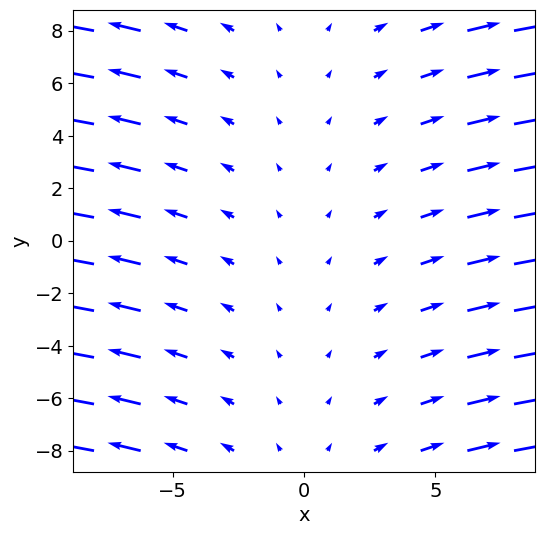

In [ ]:
R = CoordSys3D(' ')
v1 = R.x**2*R.i+ 3*R.y*R.j
display(v1)
print()
display(divergence(v1))
print()

x = np.linspace(-8, 8, 10)
y = np.linspace(-8, 8, 10)

X, Y = np.meshgrid(x, y)
U = 2*X
V = 3

plt.figure(figsize=(8,6))
plt.quiver(X, Y, U, V, color='blue', label='$x^2$')
plt.gca().set_aspect("equal")

plt.xlabel("x")
plt.ylabel("y")

plt.show()

## **Rotacional**


```{index} Curl of a vector field
```

_Curl_ of a vector field is defined as:

$$\text{curl}\mathbf{F}=\nabla\times\mathbf{F}=\Big(\frac{\partial f_z}{\partial y}-\frac{\partial f_y}{\partial z}\Big)\hat{\mathbf{i}}+\Big(\frac{\partial f_x}{\partial z}-\frac{\partial f_z}{\partial x}\Big)\hat{\mathbf{j}}+\Big(\frac{\partial f_y}{\partial x}-\frac{\partial f_x}{\partial y}\Big)\hat{\mathbf{k}}.$$

The result is another vector field. For example, let's take divergence of a vector field $\mathbf{F}=(z,x,y)$:

$$\nabla\times\mathbf{F}=(1-0)\hat{\mathbf{i}}+(1-0)\hat{\mathbf{j}}+(1-0)\hat{\mathbf{k}}=\hat{\mathbf{i}}+\hat{\mathbf{j}}+\hat{\mathbf{k}}.$$

To check our answer we can use SymPy:
```{index} SymPy: curl
```

In [ ]:
R = CoordSys3D(' ')

v1 = 3*R.x*R.z*R.i +R.x*R.j - R.y**2*R.k

display(v1)
curl(v1)

                              ⎛    2⎞     
(3⋅x_ ⋅z_ ) i_  + (x_ ) j_  + ⎝-y_  ⎠ k_  

(-2⋅y_ ) i_  + (3⋅x_ ) j_  + k_ 

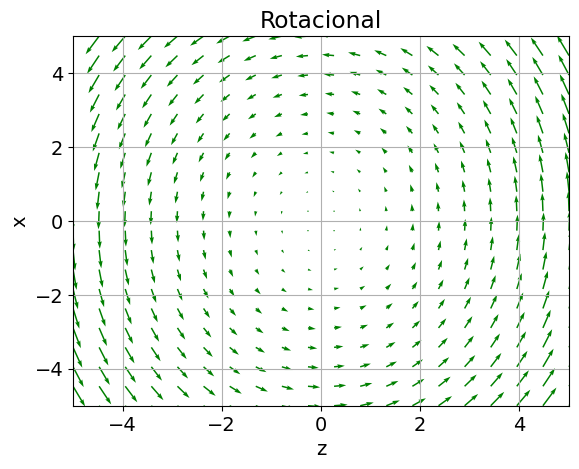

In [ ]:
x, y = (np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))

X, Y = np.meshgrid(x,y)

u = -2*Y
v = 3*X

plt.quiver(X, Y, u, v, color='g')
plt.title('Rotacional')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel('z')
plt.ylabel('x')

plt.grid()

plt.show()

### Curl of a vector field that is a gradient of a scalar field

If we take a gradient of a scalar field $\Omega$ and take a curl of that field, the identity states:

$$\nabla\times(\nabla\Omega)=0.$$

Curl of a gradient field is always zero. We can check what SymPy returns:

In [ ]:
Omega = R.x**2*R.y*R.z+4*R.x*R.z**2

display(Omega)

curl(gradient(Omega))

   2                    2
x_  ⋅y_ ⋅z_  + 4⋅x_ ⋅z_  

0

## **Laplaciano**

```{index} Laplacian for scalar/vector fields
```
Laplacian is defined as:

$$\nabla^2 = \nabla\cdot\nabla=\frac{\partial^2}{\partial x^2}$$

Laplacian can operate on both scalar and vector fields. For a vector field, it is defined as:

$$\nabla^2\mathbf{F}=(\nabla^2f_x,\nabla^2f_y,\nabla^2f_z).$$

If we take $\Omega = x^2yz+4xz^2$, then Laplacian would be:

If we take $\mathbf{F}=x^2yz\hat{\mathbf{i}}+xyz^2\hat{\mathbf{j}}+(xy-2y^2+2x^2z)\hat{\mathbf{k}}$, then we can calculate $\nabla^2f_x,\nabla^2f_y,\nabla^2f_z$:

In [ ]:
F = (R.x**2*R.y*R.z)*R.i + (R.x*R.y*R.z**2)*R.j +(R.x*R.y-2*R.y**2+2*R.x**2*R.z)*R.k
F

⎛   2        ⎞        ⎛           2⎞        ⎛     2                      2⎞   
⎝x_  ⋅y_ ⋅z_ ⎠ i_   + ⎝x_ ⋅y_ ⋅z_  ⎠ j_   + ⎝2⋅x_  ⋅z_  + x_ ⋅y_  - 2⋅y_  ⎠ k_

  
  

The $\nabla^2f_x$ is:

In [ ]:
divergence(gradient(R.x**2*R.y*R.z))

2⋅y_ ⋅z_ 